In [1]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("./preprocessed_titanic.csv")

In [3]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

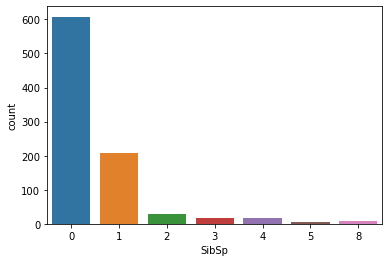

In [4]:
sns.countplot(x='SibSp', data=data)

This shows that the majority of people were single

<AxesSubplot:>

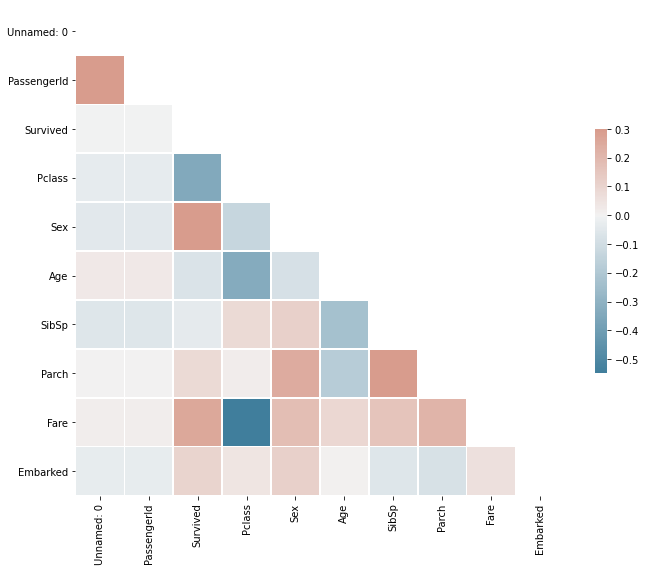

In [5]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
data.corr()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Unnamed: 0,1.000000,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
PassengerId,1.000000,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:xlabel='Pclass', ylabel='count'>

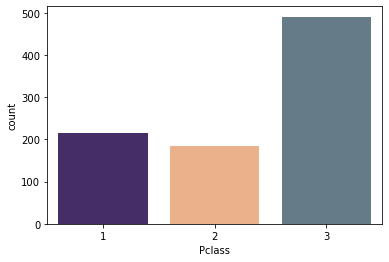

In [7]:
sns.countplot(x='Pclass', data=data, palette=['#432371','#FAAE7B',"#607c8e"])

Majority of the people on board belonged to the 3rd class passenger category

<AxesSubplot:xlabel='Survived', ylabel='count'>

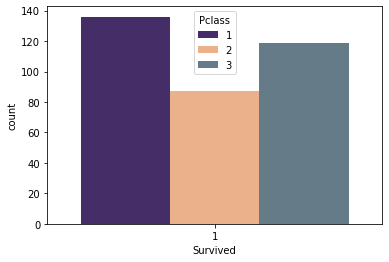

In [8]:
dd = data[ data ['Survived']==0].index
palette = sns.color_palette("mako", as_cmap=True)
data_new = data.drop(dd)
sns.countplot(x='Survived',hue='Pclass',data=data_new, palette=['#432371','#FAAE7B',"#607c8e"])


This tells us that the second class of passengers were the least of the ones that survived, and the first class was the one that survived the most.

<AxesSubplot:xlabel='Survived', ylabel='count'>

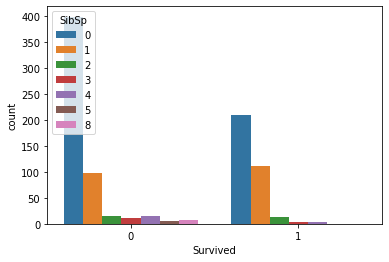

In [9]:
sns.countplot(x='Survived',hue='SibSp',data=data)

This shows us that bigger families did not survive, and even single individuals had a higher mortality rate.

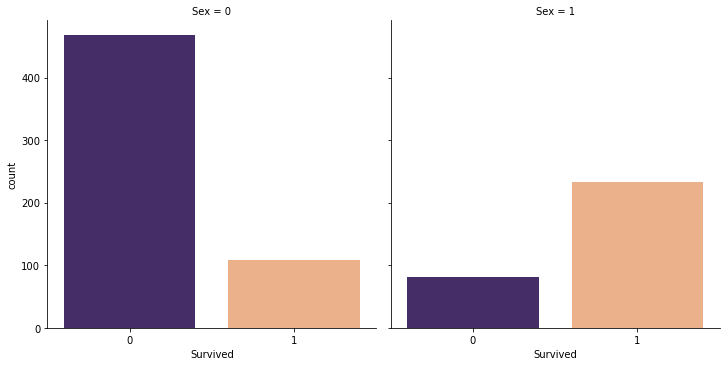

In [10]:
sns.catplot(x='Survived',col='Sex',kind='count',data=data, palette=['#432371','#FAAE7B',"#607c8e"])

This shows us that women had a higher survival rate as compared to men.

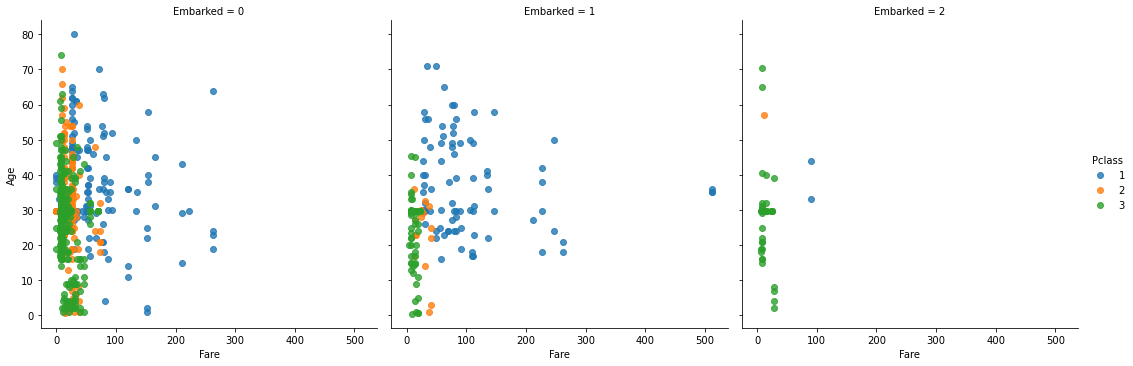

In [21]:
sns.lmplot(x='Fare', y='Age', data=data, fit_reg=False, hue="Pclass", col="Embarked")

This tells us that a lot more people started their journey from Southampton than any other destination. We can also see that people of Pclass 1 are the ones that paid the highest fair, as compared to the other classes.

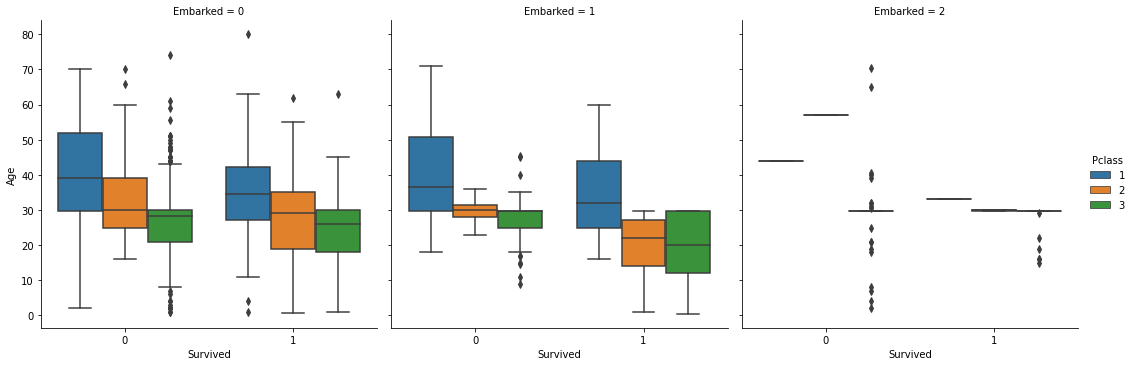

In [33]:
sns.catplot(x="Survived", y = "Age", col="Embarked", hue = "Pclass", data=data, kind="box")

Looking at this graph, we can see that the data regarding the people who embarked at Queenstown is very low, so the data is the same as the mean, for the rest of the places, we can see that people who survived the most belonged to the Pclass 1, at the same time, people consisting of Pclass 1 are the ones that generally did not survive as well. 